# Classifiers & Testing/Training Data

## Package Imports

Code to import some packages has been included below.  Feel free to import any additional packages that you need here, or later in the assignment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import statsmodels.api as sm
import statsmodels.formula.api as smf

<hr>

## 1. Using Your Resources 

Sometimes, you are asked to use a new function that you haven't used before.  In those instances, it can be helpful to turn to online searches and documentations, to figure out what to do.

For this question, search online for information about the function roc_auc_score that is located in sklearn.metrics, within the scikit learn package.  

You should find a webpage that includes instructions for how to use this function.  What are the first two arguments (located inside the parentheses of the function and referred to as parameters) requested when using the roc_auc_score function?  You can provide these exactly as they are written on the webpage.

For the first of these arguments, you should be able to find additional information a little further down the page.  Using this information, what is a brief description of what is requested.  You can provide this using information from the page or notation that we've used in the course.

Then, provide the link to the webpage that you are using.

y_true, y_score

First argument 'y_true' means true labels or binary label indicators. The second argument 'y_score' means target scores according to the document, and this would indicate estimented y values ($\hat{y}$) from what we've used in the course.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

<hr>

## <u>Case Study</u>: Predicting Airbnb Superhost Status

Suppose that you have a spare room in your house (in Seattle) and you are considering advertising this room to guests on Airbnb. Airbnb superhosts are considered to be experienced hosts who provide a shining example for other hosts, and extraordinary experiences for their guests. Once a host reaches Superhost status, a superhost badge will automatically appear on their listing and profile to help guests identify them. You would like to assess your chances of being named a superhost with your property.

The following dataset is a sample (assume random) of available Airbnb listings in Seattle, WA. These listings were collected in January 2016, and filtered to just contain listings from the five most popular Seattlbe neighborhoods (for Airbnb listings) and just contain listings that are either in a house or apartment property.

This dataset contains the following variables.

**Listing Information**
The dataset contains the following information about the Airbnb *listing*:
* <u>price</u>: price of the listing (per night)(in US dollars)
* <u>review_scores_rating</u>: the average rating of the listing [0,100] (100 is the best)
* <u>number_of_reviews</u>: the number of reviews for the listing
* <u>security_deposit</u>: the security deposit required for the listing (in US dollars)
* <u>cleaning_fee</u>: the cleaning fee required for the listing (in US dollars)
* <u>neighborhood</u>: the neighborhood of Seattle the listing is located in
* <u>property_type</u>: is the listing in a 'House' or 'Apartment'
* <u>room_type</u>: is the listing a 'Entire home/apt', 'Private room', or 'Shared room'
* <u>accommodates</u>: how many guests will the listing accommodate
* <u>bathrooms</u>:how many bathrooms does the listing have
* <u>beds</u>: how many beds does the listing have

**Host Information**
The dataset also contains the following information about the *host* of the given Airbnb listing:
* <u>host_is_superhost</u>: is the host a "superhost": t=True, f=False
* <u>host_has_profile_pic</u>: does the host have a profile pic in their bio: t=True, f=False
* <u>host_response_time</u>: how fast will the host respond to requests (on average)
* <u>host_acceptance_rate</u>: what percent of booking requests will the host accept


## 2. Preparing the Data

**a)** Read the seattle_airbnb_listings_cleaned.csv file into a dataframe. This csv file does not contain any missing values.

In [2]:
airbnb = pd.read_csv('seattle_airbnb_listings_cleaned.csv')

In [3]:
airbnb.head()

,price,review_scores_rating,number_of_reviews,security_deposit,cleaning_fee,neighborhood,property_type,room_type,accommodates,bathrooms,beds,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified
0,300,100,24,500,95,Wallingford,House,Entire home/apt,5,1.5,3,within a few hours,1.0,1,t,t,t
1,149,96,11,300,105,Wallingford,Apartment,Entire home/apt,6,1.0,3,within an hour,1.0,1,f,t,t
2,95,95,79,150,40,Wallingford,Apartment,Entire home/apt,3,1.0,2,within an hour,1.0,1,f,t,t
3,105,100,13,500,50,Wallingford,House,Private room,2,2.0,1,within a few hours,1.0,1,t,t,t
4,140,99,30,250,65,Wallingford,House,Entire home/apt,2,1.0,1,within an hour,1.0,1,t,t,t


**b)** Add a variable to the data that records whether a given Airbnb listing host **is a superhost** using values of 1 for being a superhost and 0 for not being a superhost.

In [4]:
airbnb['is_a_superhost']=airbnb['host_is_superhost'].map({'t':1,'f':0})
airbnb.head()

,price,review_scores_rating,number_of_reviews,security_deposit,cleaning_fee,neighborhood,property_type,room_type,accommodates,bathrooms,beds,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,is_a_superhost
0,300,100,24,500,95,Wallingford,House,Entire home/apt,5,1.5,3,within a few hours,1.0,1,t,t,t,1
1,149,96,11,300,105,Wallingford,Apartment,Entire home/apt,6,1.0,3,within an hour,1.0,1,f,t,t,0
2,95,95,79,150,40,Wallingford,Apartment,Entire home/apt,3,1.0,2,within an hour,1.0,1,f,t,t,0
3,105,100,13,500,50,Wallingford,House,Private room,2,2.0,1,within a few hours,1.0,1,t,t,t,1
4,140,99,30,250,65,Wallingford,House,Entire home/apt,2,1.0,1,within an hour,1.0,1,t,t,t,1


**c)** Divide the data into two separate datasets: a training set with 75% of the observations, and a testing set with 25% of the observations.  Perform this with a random_state of 428.

In [5]:
from sklearn.model_selection import train_test_split

df_train , df_test = train_test_split(airbnb, 
                                     test_size = 0.25,
                                     random_state = 428)

**d)** Confirm that this split was performed correctly.

In [6]:
print(df_train.shape[0] / airbnb.shape[0], df_test.shape[0] / airbnb.shape[0])

0.7492625368731564 0.25073746312684364


## 3. Describing a Model 

For this question, we will focus on fitting a logistic regression model, interpreting the values in that model, and performing inference for this model.

**a)** Fit a logistic regression model to the **training data** that will predict the probability that a given Airbnb listing host **is a superhost**, given the following explanatory variables:
* listing price
* review scores rating
* number of reviews
* neighborhod
* property type

Display the summary output table.

In [7]:
result = smf.logit('is_a_superhost ~ price + review_scores_rating + number_of_reviews + neighborhood + property_type', data = df_train).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.471822
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         is_a_superhost   No. Observations:                  254
Model:                          Logit   Df Residuals:                      245
Method:                           MLE   Df Model:                            8
Date:                Fri, 28 Apr 2023   Pseudo R-squ.:                  0.2463
Time:                        04:30:47   Log-Likelihood:                -119.84
converged:                       True   LL-Null:                       -159.01
Covariance Type:            nonrobust   LLR p-value:                 1.054e-13
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -35.3497      6.633     -5.329      0.000     -48.351     -22.349
neighborhood[T.Broadway]       -1.4747      0.461     -3.201      0.001      -2.378      -0.572
neighborhood[T.Fremont]        -1.2160      0.636     -1.911      0.056      -2.463       0.031
neighborhood[T.Minor]          -0.5752      0.586     -0.981      0.326      -1.724       0.574
neighborhood[T.Wallingford]    -1.1621      0.550     -2.114      0.035      -2.240      -0.085
property_type[T.House]          0.0510      0.405      0.126      0.900      -0.742       0.844
price                           0.0008      0.002      0.500      0.617      -0.002       0.004
review_scores_rating            0.3594      0.067      5.331      0.000       0.227       0.491
number_of_reviews               0.0229      0.005      4.561      0.000       0.013       0.033
===============================================================================================
"""

**b)** Write the fitted logistic regression model equation. Make sure to use the correct notation.

$\hat{y}$ = -35.3497 -1.4747 * neighborhood[T.Broadway] -1.2160 * neighborhood[T.Fremont] -0.5752 * neighborhood[T.Minor] -1.1621 * neighborhood[T.Wallingford] + 0.0510 * property_type[T.House] + 0.0008 * price + 0.3594 * review_scores_rating + 0.0229 * number_of_reviews

($\hat{y}$ is $log(\frac{\hat{p}}{1-\hat{p}})$ as $\hat{p}$ is an estimated probability that a given airbnb listing host is a superhost.)

**c)** If $\hat{\beta}_i$ is your slope that corresponds to listing price, calculate $e^{\hat{\beta}_i}$ and put it into words. **Make sure to not use causal language!**

In [8]:
slope_price = 0.0008
odds_price = np.exp(slope_price)
print(odds_price)

1.0008003200853504


In [9]:
airbnb['property_type'].unique()

array(['House', 'Apartment'], dtype=object)

For a given airbnb listing that is located in neighborhood Belltown, its property type is an apartment,its price is 0, its review scores rating is 0, and have 0 reviews, the estimated exepcted odds of being a super host is 1.0008. 

**d)** We could perform inference specific to the slope for the listing price.  Python by default provides a test statistic and *p*-value.  Provide **two** equivalent versions of the hypotheses that correspond to the test statistic and *p*-value that Python provides in the tables from **3a**.

As a challenge, you might also confirm the calculation of the test statistic and *p*-value.

Note that typically we wouldn't need to perform a test/train split to perform inference.  We only do so for this problem because we only plan to fit one model.

**ver1**

$H_0: \beta=0$

$H_A:$ $\beta\neq 0$ 

**ver2**

$H_0: e^\beta=1$

$H_A: e^\beta\neq 1$ 

I would have to test this hypotheses at a 5% level to correspond to the test statistic(0.5) and p-value(0.617) that is provided in the tables from **3a**. 

In [10]:
# calculation of the test statistic and p-value

point_estimate = 0.0008
std_err = 0.002
test_statistic = (point_estimate - 0) / std_err
print('test statistic :', test_statistic)

from scipy.stats import norm
p_value = 2 * (1 - norm.cdf(test_statistic))
print('p_value :', p_value)

test statistic : 0.4
p_value : 0.6891565167793516


## 4. Creating a Classifier 
In this problem, we will use our model from Question **3** to create a classifier for our **testing data**.

**a)** Use the predictive probability threshold of $p_0 = 0.6$ and the model from Question **3** to build a classifier on the **testing data**.  Add the predicted classifications as a column to the testing data, and display this data.

In [11]:
pred_probabilities = result.predict(exog=dict(df_test))
df_test['predictive_p']=pred_probabilities
df_test['yhat']=1*(df_test['predictive_p']>0.6)
df_test

,price,review_scores_rating,number_of_reviews,security_deposit,cleaning_fee,neighborhood,property_type,room_type,accommodates,bathrooms,beds,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,is_a_superhost,predictive_p,yhat
154,100,90,123,95,45,Belltown,Apartment,Entire home/apt,4,1.0,2,within an hour,1.00,1,f,t,t,0,0.473210,0
188,69,100,2,95,25,Broadway,Apartment,Entire home/apt,2,1.0,1,within an hour,0.99,1,f,t,t,0,0.313338,0
323,150,88,8,250,105,Fremont,Apartment,Entire home/apt,6,1.0,3,within a few hours,0.90,1,f,t,f,0,0.009623,0
261,104,100,22,150,30,Broadway,Apartment,Private room,2,1.0,1,within a few hours,1.00,1,f,t,t,0,0.426128,0
268,69,80,1,95,25,Broadway,Apartment,Entire home/apt,2,1.0,1,within an hour,0.99,1,f,t,t,0,0.000337,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,95,80,1,300,75,Wallingford,Apartment,Entire home/apt,2,1.0,1,within a few hours,1.00,1,t,t,t,1,0.000471,0
329,115,99,14,199,60,Fremont,Apartment,Entire home/apt,4,1.0,2,within an hour,1.00,1,f,t,t,0,0.360675,0
51,254,97,70,300,125,Wallingford,House,Entire home/apt,8,3.0,3,within an hour,1.00,1,t,t,t,1,0.552542,0
76,81,94,51,200,5,Minor,Apartment,Entire home/apt,2,1.0,1,within an hour,1.00,1,f,t,t,0,0.287137,0


**b)** Calculate the entries of a confusion matrix for this classification.

In [12]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=df_test['is_a_superhost'],y_pred = df_test['yhat'] )

array([[60,  5],
       [13,  7]], dtype=int64)

**c)** For this classifier, identify and describe the different types of classifications that are possible.

* How many true negatives are in this classification? What does a "true negative" represent in this problem?
* How many false positives are in this classification? What does a "false positive" represent in this problem?
* How many false negatives are in this classification? What does a "false negative" represent in this problem?
* How many true positives are in this classification? What does a "true positive" represent in this problem?

In [13]:
tn, fp, fn, tp = confusion_matrix(y_true=df_test['is_a_superhost'],
                                  y_pred=df_test['yhat']).ravel()
(tn, fp, fn, tp)

(60, 5, 13, 7)

1. There are 60 true negatives in this classification, this means 60 airbnb listings are actually not owned by superhosts and they are classified as they are. 

2. There are 5 false positives in this classification, this means 5 airbnb listings are actually owned by superhosts but they are classified incorrectly, as not being owned by superhosts. 

3. There are 13 false negatives in this classification, this means 13 airbnb listings were actually not owned by superhosts but they are classified incorrectly, as owned by superhosts. 

4. There are 7 true positives in this classification, this means 7 airbnb listings were actually owned by superhosts and they are classified as they are. 

**d)** Calculate the following accuracy measures for this classification of the dataset:
* sensitivity rate
* specificity rate
* false positive rate

In [14]:
sensitivity_rate = tp / (tp + fn)
print('sensitivity rate: ', sensitivity_rate)

sensitivity rate:  0.35


In [15]:
specificity_rate = tn / (tn + fp)
print('specificity rate: ', specificity_rate)

specificity rate:  0.9230769230769231


In [16]:
false_positive_rate = fp / (tn + fp)
print('false positive rate:', false_positive_rate)

false positive rate: 0.07692307692307693


**e)** Which type of host was our classifier model better at correctly classifying: hosts that are *actually not* super hosts, or hosts that *actually are* super hosts? Explain.

The sensitivity rate is not so high, which indicates that the losgistic regression model with threshold $p_0=0.6$ did not do well at correctly classifying hosts of airbnbs that actually are superhosts. 

Meanwhile, specificity rate is quite high and false positive rate is quite low, which indicates that my model with threshold $p_0=0.6$ did a pretty good job at correctly classifying hosts of airbnbs that actually are not superhost. 

**f)** Next, classify the observations in the **testing data** using the model Question 3 and a predictive probability threshold of $p_0=0.2$. Calculate the sensitivity rate and specificity rate for this classification as well.

In [17]:
df_test['yhat_2']=1*(df_test['predictive_p']>0.2)
df_test

,price,review_scores_rating,number_of_reviews,security_deposit,cleaning_fee,neighborhood,property_type,room_type,accommodates,bathrooms,...,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,is_a_superhost,predictive_p,yhat,yhat_2
154,100,90,123,95,45,Belltown,Apartment,Entire home/apt,4,1.0,...,within an hour,1.00,1,f,t,t,0,0.473210,0,1
188,69,100,2,95,25,Broadway,Apartment,Entire home/apt,2,1.0,...,within an hour,0.99,1,f,t,t,0,0.313338,0,1
323,150,88,8,250,105,Fremont,Apartment,Entire home/apt,6,1.0,...,within a few hours,0.90,1,f,t,f,0,0.009623,0,0
261,104,100,22,150,30,Broadway,Apartment,Private room,2,1.0,...,within a few hours,1.00,1,f,t,t,0,0.426128,0,1
268,69,80,1,95,25,Broadway,Apartment,Entire home/apt,2,1.0,...,within an hour,0.99,1,f,t,t,0,0.000337,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,95,80,1,300,75,Wallingford,Apartment,Entire home/apt,2,1.0,...,within a few hours,1.00,1,t,t,t,1,0.000471,0,0
329,115,99,14,199,60,Fremont,Apartment,Entire home/apt,4,1.0,...,within an hour,1.00,1,f,t,t,0,0.360675,0,1
51,254,97,70,300,125,Wallingford,House,Entire home/apt,8,3.0,...,within an hour,1.00,1,t,t,t,1,0.552542,0,1
76,81,94,51,200,5,Minor,Apartment,Entire home/apt,2,1.0,...,within an hour,1.00,1,f,t,t,0,0.287137,0,1


In [18]:
tn_2, fp_2, fn_2, tp_2 = confusion_matrix(y_true=df_test['is_a_superhost'],
                                          y_pred=df_test['yhat_2']).ravel()
(tn_2, fp_2, fn_2, tp_2)

(34, 31, 4, 16)

In [19]:
sensitivity_rate_2 = tp_2 / (tp_2 + fn_2)
print('sensitivity rate: ', sensitivity_rate_2)
specificity_rate_2 = tn_2 / (tn_2 + fp_2)
print('specificity rate: ', specificity_rate_2)

sensitivity rate:  0.8
specificity rate:  0.5230769230769231


**g)** Suppose that you work at a tourism analytics firm that helps clients make decisions about their Airbnb listings that help them maximize their listing profits. One of the services that your firm provides is predicting the likelihood that a client will quickly become a superhost, once they list a property on the market.

Clients who actually have what it takes to be named as a superhost will be more likely to keep soliciting the firm's services, and thus accurately telling them that they have a shot at becoming a superhost will keep them from pursuing another firm for help. Therefore, it is very important that your firm accurately predicts these "actual super hosts" correctly as superhosts. 

On the other hand, it is not as big of a deal if the firm incorrectly predicts quite a few hosts that will "not actually be superhosts" as being a super host.

Given these incentives for the firm, which classification threshold would you choose to use: $p_0=0.6$ or $p_0=0.2$? Explain. 

Given these incentives for the firm, it would be better to select a model with higher sensitivity rate rather than high specificity rate.

Therefore I would choose $p_0=0.2$ as a classification threshold. (A model with threshold $p_0=0.6$ : sensitivity = 0.35, specificity = 0.92, a model with threshold $p_0=0.2$ : sensitivity = 0.80, specificity = 0.52)

## 5. Comparing Two Models 

We would like to determine if the model we fit in Question 3 is a good model to base our classification on, or if we might prefer a different model.  In this question, we will fit and compare a second model to the model from Question **3**. 

**a)** Fit another logistic regression model to the **training data** that predicts the probability that a given Airbnb listing host **is a superhost**, given the following explanatory variables:
* price
* number of reviews
* neighborhood
* interaction of price with neighborhood

Display the summary output table.

In [20]:
result_2 = smf.logit('is_a_superhost ~ price + number_of_reviews + neighborhood + price*neighborhood', data = df_train).fit()
result_2.summary()

Optimization terminated successfully.
         Current function value: 0.544519
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         is_a_superhost   No. Observations:                  254
Model:                          Logit   Df Residuals:                      243
Method:                           MLE   Df Model:                           10
Date:                Fri, 28 Apr 2023   Pseudo R-squ.:                  0.1302
Time:                        04:36:53   Log-Likelihood:                -138.31
converged:                       True   LL-Null:                       -159.01
Covariance Type:            nonrobust   LLR p-value:                 9.545e-06
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             0.2568      0.568      0.452      0.651      -0.856       1.370
neighborhood[T.Broadway]             -3.7916      0.900     -4.213      0.000      -5.556      -2.027
neighborhood[T.Fremont]              -2.4793      1.038     -2.387      0.017      -4.515      -0.444
neighborhood[T.Minor]                -0.4580      0.901     -0.508      0.611      -2.224       1.307
neighborhood[T.Wallingford]          -1.8391      0.789     -2.331      0.020      -3.385      -0.293
price                                -0.0029      0.003     -0.884      0.376      -0.009       0.004
price:neighborhood[T.Broadway]        0.0160      0.006      2.798      0.005       0.005       0.027
price:neighborhood[T.Fremont]         0.0067      0.005      1.273      0.203      -0.004       0.017
price:neighborhood[T.Minor]        2.203e-05      0.006      0.004      0.997      -0.011       0.011
price:neighborhood[T.Wallingford]     0.0050      0.005      1.038      0.299      -0.004       0.014
number_of_reviews                     0.0134      0.004      3.362      0.001       0.006       0.021
=====================================================================================================
"""


**b)** We will evaluate each model on the testing data.  Generate the ROC curve and calculate the corresponding AUC for the model fit in **Question 3** (using the **testing data**).

In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [22]:
fpr_pew, tpr_pew, score_pew = roc_curve(y_true=df_test['is_a_superhost'], y_score=df_test['predictive_p'])
auc_pew = roc_auc_score(y_true=df_test['is_a_superhost'], y_score=df_test['predictive_p'])

In [23]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

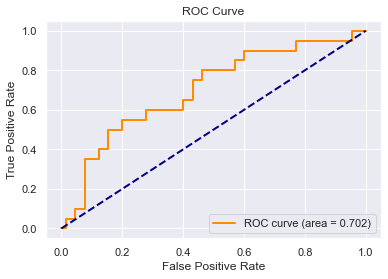

In [24]:
plot_roc(fpr_pew, tpr_pew, auc_pew)
# the ROC Curve is as below, and the corresponding area under curve (AUC) = 0.702

**c)** Now, generate the ROC curve and calculate the corresponding AUC for the model fit in **Question 5a** (using the **testing data**).

In [25]:
pred_probabilities_2 = result_2.predict(exog=dict(df_test))
df_test['predictive_p_2']=pred_probabilities_2

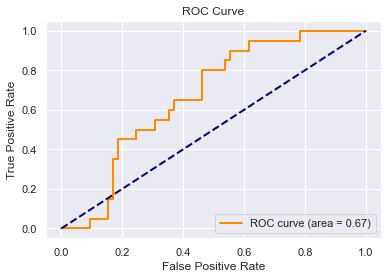

In [26]:
fpr_pew_2, tpr_pew_2, score_pew_2 = roc_curve(y_true=df_test['is_a_superhost'], y_score=df_test['predictive_p_2'])
auc_pew_2 = roc_auc_score(y_true=df_test['is_a_superhost'], y_score=df_test['predictive_p_2'])

plot_roc(fpr_pew_2, tpr_pew_2, auc_pew_2)
# the ROC Curve is as below, and the corresponding area under curve (AUC) = 0.67

**d)** Over all possible thresholds for the classifier, which model generally performs better?  Explain.

The model fit in Question 3 has higher AUC(0.702) than that of model fit in question 5a(0.67). Therefore, the model fit in Q3 generally performs better for over all possible threshold for the classifier. 

**e)** What would the false positive rate and the true positive rate be for an ideal (perfect) classifier?

Ideally, a perfect classifier would give us a false positive rate of 0 and true positive rate of 1. 

**f)** Which of the two classifier models (from the **Question 3** model and the **Question 5** model) will have a predictive probability threshold that will give us a true positive rate and false positive rate that is closer to the one described in **Question 5e**?  

Completely describe this best classifier that you observe.  That is, what classifier would you recommend using.  Be sure that it is complete, so that someone else could apply this classifier to new data.

The classifier model from the Question 3 would have a predictive probability threshold that gives us a tpr closer to 1 and fpr closer to 0. 

This is because if we look at the points on the ROC curve of both models, the first model has a point that is more closer to point (fpr, tpr) = (0,1) compared to the second model. 

Therefore, I would recommend the model from Question 3. 